# Similarities with Series & DataFrame

#### Loading Libraries

In [1]:
# Numerical Computing
import numpy as np
# Data Manipulation
import pandas as pd
# Data Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#### Getting Data

In [2]:
pd.set_option('display.max_rows', 10)             
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
    'siena2018-pres.csv'

In [3]:
df = pd.read_csv(url, index_col=0)

In [4]:
df

,Seq.,President,Party,Bg,Im,Int,IQ,L,WR,AC,...,PL,RC,CAp,HE,EAp,DA,FPA,AM,EV,O
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,18,1,1,1,1,2,2,1,2,1
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,28,17,4,13,15,19,13,16,10,14
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,5,5,7,20,4,6,9,7,5,5
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,...,9,10,6,14,7,11,19,11,8,7
5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,...,12,8,11,9,9,10,5,6,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,41,George H. W. Bush,Republican,10,27,18,19,20,27,13,...,21,20,29,28,19,26,10,17,21,21
41,42,Bill Clinton,Democratic,21,12,39,8,11,17,3,...,13,18,10,5,12,9,18,30,14,15
42,43,George W. Bush,Republican,17,29,33,41,21,20,28,...,19,22,28,36,29,30,38,36,34,33
43,44,Barack Obama,Democratic,24,11,13,9,15,23,16,...,23,31,14,10,13,13,20,10,11,17


In [5]:
df.dtypes

Seq.         object
President    object
Party        object
Bg            int64
Im            int64
              ...  
DA            int64
FPA           int64
AM            int64
EV            int64
O             int64
Length: 24, dtype: object

In [7]:
# Helper function to clean data
def tweak_siena_pres(df):
    def int64_to_uint8(df_):
        cols = df_.select_dtypes('int64')
        return (df_
                .astype({col:'uint8' for col in cols}))


    return (df
     .rename(columns={'Seq.':'Seq'})    # 1
     .rename(columns={k:v.replace(' ', '_') for k,v in
        {'Bg': 'Background',
         'PL': 'Party leadership', 'CAb': 'Communication ability',
         'RC': 'Relations with Congress', 'CAp': 'Court appointments',
         'HE': 'Handling of economy', 'L': 'Luck',
         'AC': 'Ability to compromise', 'WR': 'Willing to take risks',
         'EAp': 'Executive appointments', 'OA': 'Overall ability',
         'Im': 'Imagination', 'DA': 'Domestic accomplishments',
         'Int': 'Integrity', 'EAb': 'Executive ability',
         'FPA': 'Foreign policy accomplishments',
         'LA': 'Leadership ability',
         'IQ': 'Intelligence', 'AM': 'Avoid crucial mistakes',
         'EV': "Experts' view", 'O': 'Overall'}.items()})
     .astype({'Party':'category'})  # 2
     .pipe(int64_to_uint8)  # 3
     .assign(Average_rank=lambda df_:(df_.select_dtypes('uint8') # 4
                 .sum(axis=1).rank(method='dense').astype('uint8')),
             Quartile=lambda df_:pd.qcut(df_.Average_rank, 4,
                 labels='1st 2nd 3rd 4th'.split())
            )
    )

#### Viewing Data

In [11]:
pres = tweak_siena_pres(df)
pres.head(3)

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,1,1,1,2,2,1,2,1,1,1st
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,13,2nd
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,7,20,4,6,9,7,5,5,5,1st


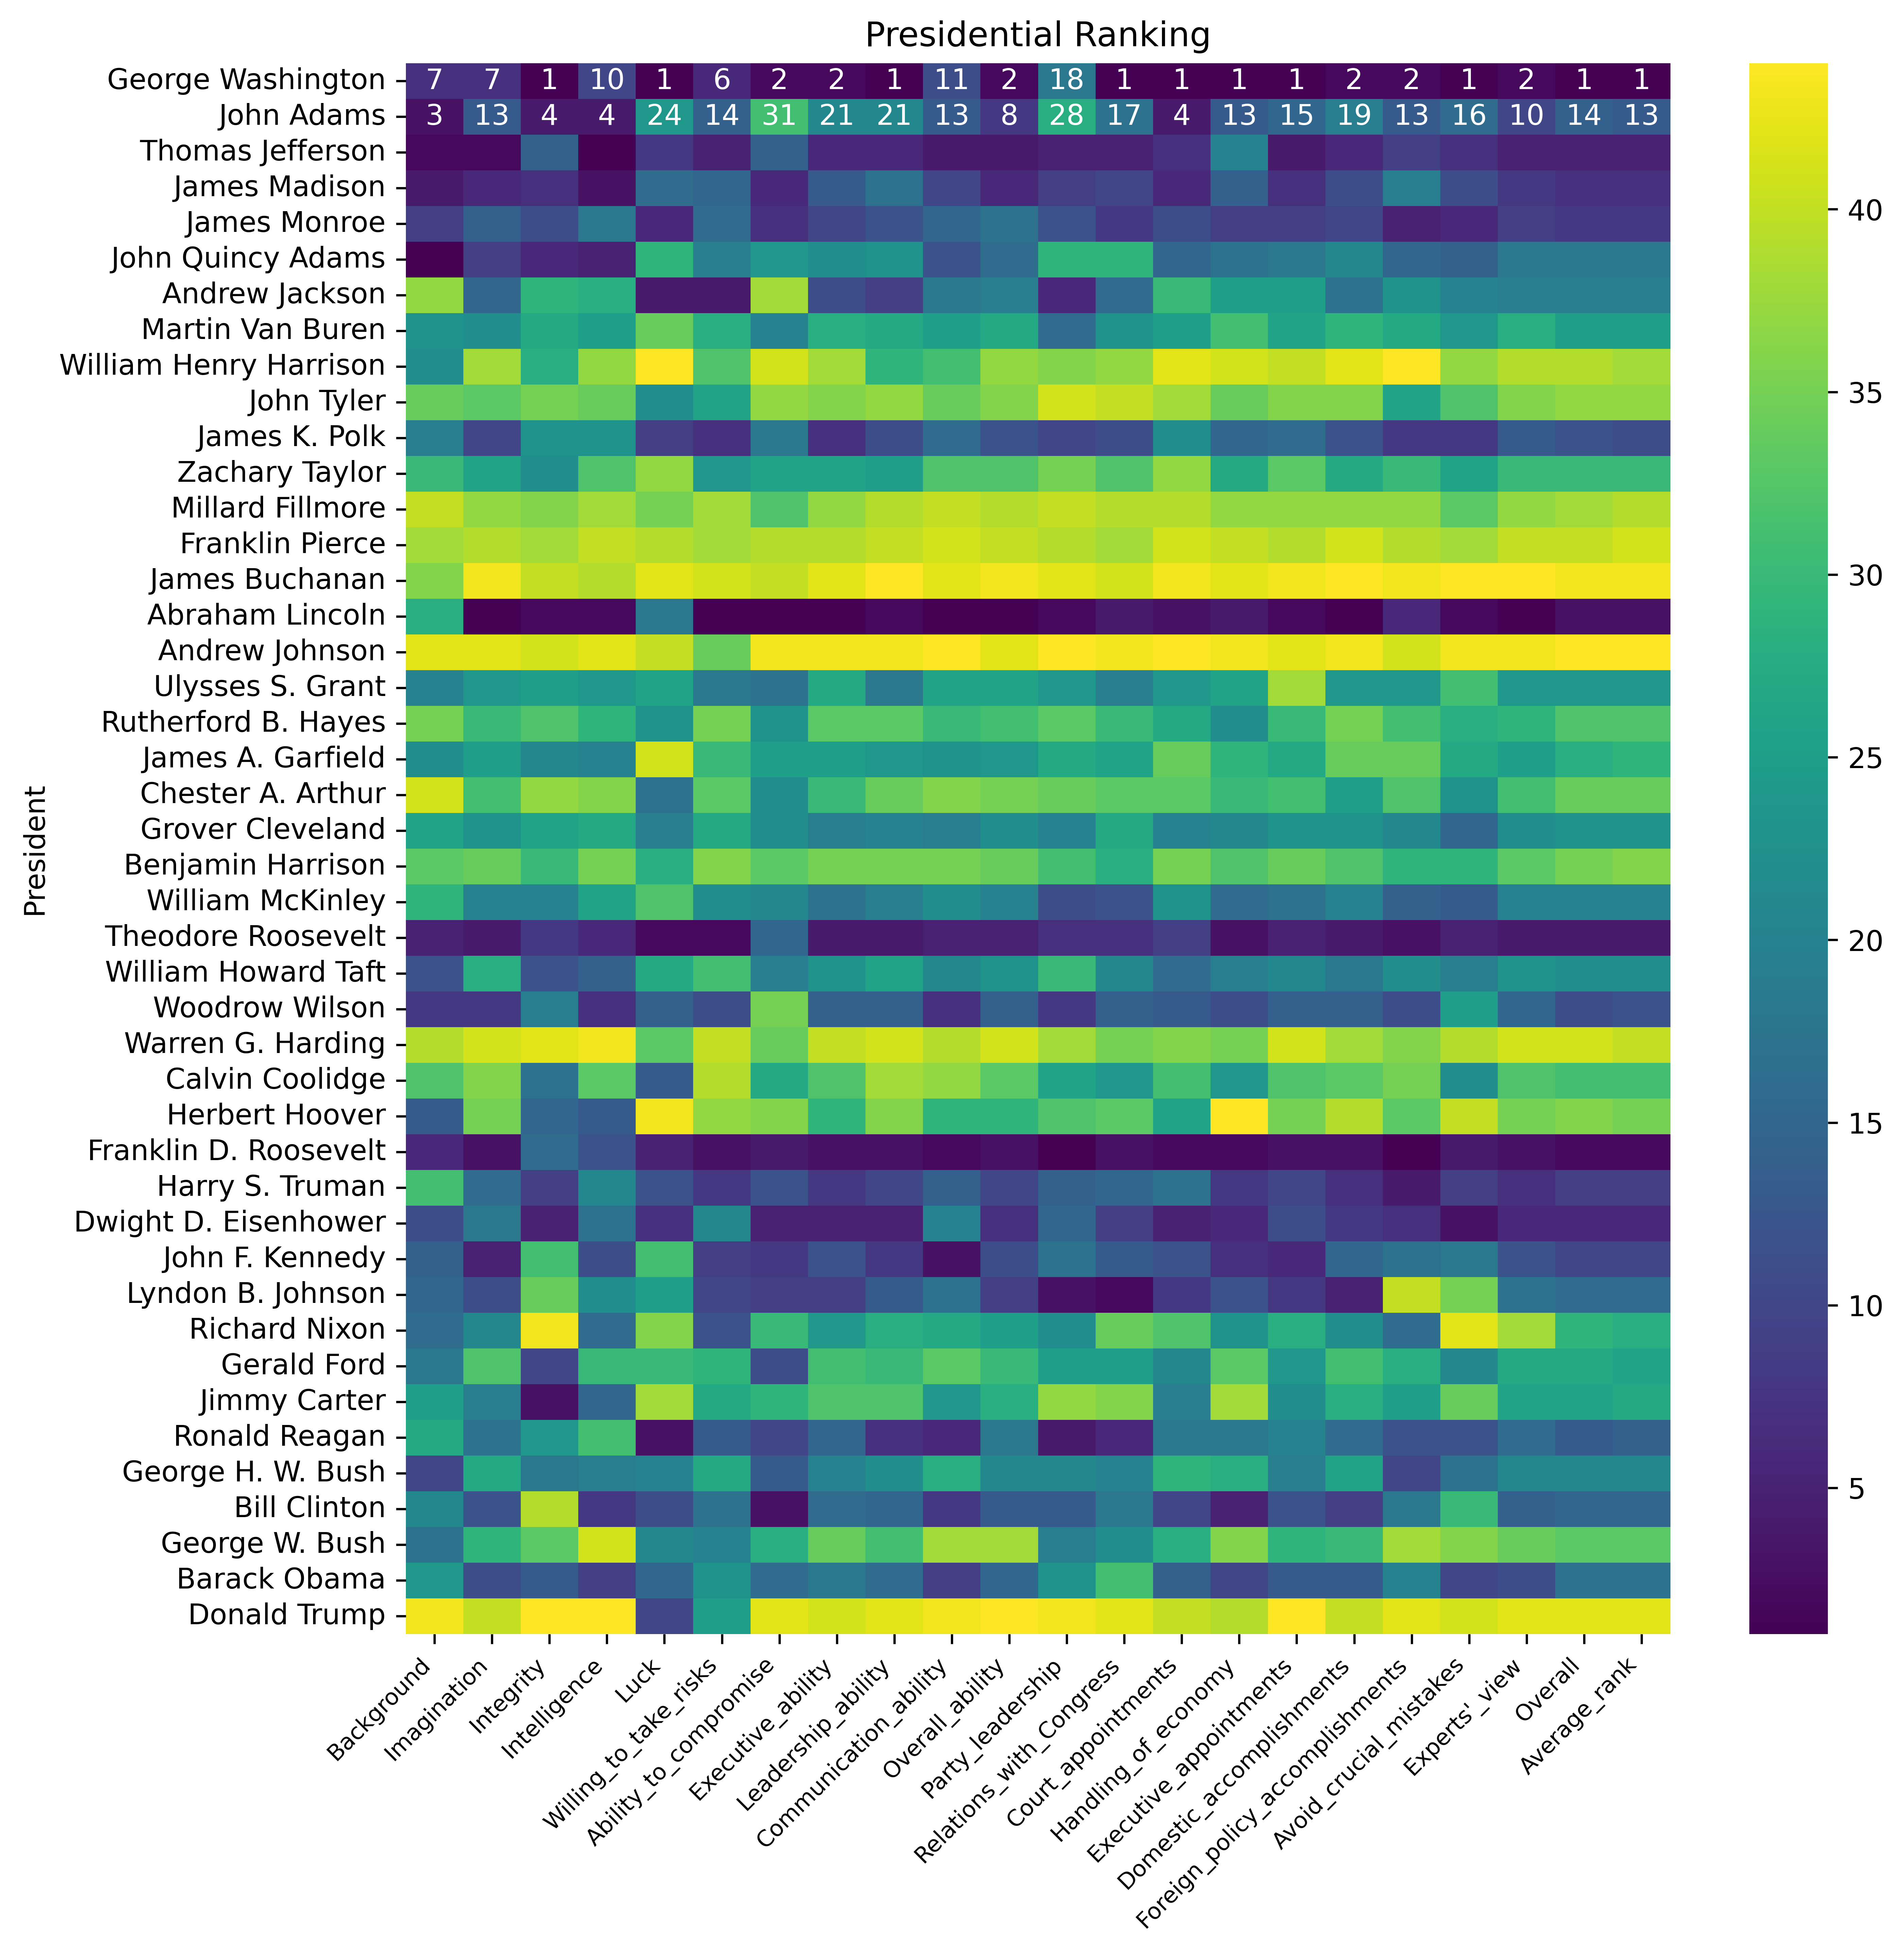

In [12]:
fig, ax = plt.subplots(figsize=(10,10), dpi=600)
g = sns.heatmap((tweak_siena_pres(df)     
   .set_index('President')
   .iloc[:,2:-1]
  ),annot=True, cmap='viridis', ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=45, fontsize=8,
    ha='right')    
_ = plt.title('Presidential Ranking')

In [13]:
pres.sample(3)

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
18,18,Ulysses S. Grant,Republican,20,24,25,24,26,18,17,...,24,26,38,24,24,31,24,24,24,3rd
33,34,Dwight D. Eisenhower,Republican,11,18,5,17,7,21,5,...,5,6,11,8,7,3,6,6,6,1st
34,35,John F. Kennedy,Democratic,14,5,31,11,31,9,8,...,12,7,6,15,17,18,12,10,10,1st


# Math Methods in DataFrames

In [14]:
pres = tweak_siena_pres(df)

#### Index Alignment

In [18]:
scores = (pres.loc[:,'Background': 'Average_rank'])
scores

,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,Executive_ability,Leadership_ability,Communication_ability,...,Relations_with_Congress,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank
1,7,7,1,10,1,6,2,2,1,11,...,1,1,1,1,2,2,1,2,1,1
2,3,13,4,4,24,14,31,21,21,13,...,17,4,13,15,19,13,16,10,14,13
3,2,2,14,1,8,5,14,6,6,4,...,5,7,20,4,6,9,7,5,5,5
4,4,6,7,3,16,15,6,13,17,10,...,10,6,14,7,11,19,11,8,7,7
5,9,14,11,18,6,16,7,10,12,15,...,8,11,9,9,10,5,6,9,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,10,27,18,19,20,27,13,20,22,28,...,20,29,28,19,26,10,17,21,21,21
41,21,12,39,8,11,17,3,16,15,8,...,18,10,5,12,9,18,30,14,15,15
42,17,29,33,41,21,20,28,34,31,38,...,22,28,36,29,30,38,36,34,33,33
43,24,11,13,9,15,23,16,18,16,9,...,31,14,10,13,13,20,10,11,17,17


In [19]:
s1 = scores.iloc[:3, :4]
s1

,Background,Imagination,Integrity,Intelligence
1,7,7,1,10
2,3,13,4,4
3,2,2,14,1


In [22]:
s2 = scores.iloc[1:6, :5]
s2

,Background,Imagination,Integrity,Intelligence,Luck
2,3,13,4,4,24
3,2,2,14,1,8
4,4,6,7,3,16
5,9,14,11,18,6
6,1,9,6,5,29


In [23]:
s1 + s2

,Background,Imagination,Integrity,Intelligence,Luck
1,NaN,NaN,NaN,NaN,NaN
2,6.0,26.0,8.0,8.0,NaN
3,4.0,4.0,28.0,2.0,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN


#### Duplicate Index Entries

In [24]:
scores.iloc[:3, :4] + pd.concat([scores.iloc[1:6, :5]]*2)

,Background,Imagination,Integrity,Intelligence,Luck
1,NaN,NaN,NaN,NaN,NaN
2,6.0,26.0,8.0,8.0,NaN
2,6.0,26.0,8.0,8.0,NaN
3,4.0,4.0,28.0,2.0,NaN
3,4.0,4.0,28.0,2.0,NaN
...,...,...,...,...,...
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN


In [25]:
pd.concat([scores.iloc[1:6, :5]]*2).index.duplicated().any()

True

# Looping & Aggregation

In [27]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
    'siena2018-pres.csv'
df = pd.read_csv(url, index_col=0)
pres = tweak_siena_pres(df)

In [28]:
pres = tweak_siena_pres(df)
print(type(pres))


<class 'pandas.core.frame.DataFrame'>


In [29]:
for col_name, col in pres.iteritems():
    print(col_name, type(col))
    break

AttributeError: 'DataFrame' object has no attribute 'iteritems'

In [26]:
# iteration over columns (col_name, series) tuple
for col_name, col in pres.iteritems():
    print(col_name, type(col))
    break

AttributeError: 'DataFrame' object has no attribute 'iteritems'